In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df_cn = pd.read_csv("data_scored/cn_news_scored.csv")
df_us = pd.read_csv("data_scored/us_news_scored.csv")

df_cn_en = pd.read_csv("data_scored/cn_to_en_scored.csv")
df_us_cn = pd.read_csv("data_scored/us_to_cn_scored.csv")

df_cn["date"] = pd.to_datetime(df_cn["time"])
df_us["date"] = pd.to_datetime(df_us["Date"])

df_cn_en["date"] = pd.to_datetime(df_cn["time"])
df_us_cn["date"] = pd.to_datetime(df_us_cn["Date"])

df_cn = df_cn[["date", "Headlines", "score"]].copy()
df_us = df_us[["date", "Headlines", "score"]].copy()

df_cn_en = df_cn_en[["date", "Headlines", "score"]].copy()
df_us_cn = df_us_cn[["date", "Headlines", "score"]].copy()

df_cn["country"] = "China"
df_us["country"] = "US"

df_cn_en["country"] = "China_en"
df_us_cn["country"] = "US_cn"

df_all = pd.concat([df_cn, df_us, df_cn_en, df_us_cn], ignore_index=True)

df_daily = df_all.groupby(["date", "country"])["score"].mean().reset_index(name="avg_sentiment")

df_pivot = df_daily.pivot(index="date", columns="country", values="avg_sentiment")


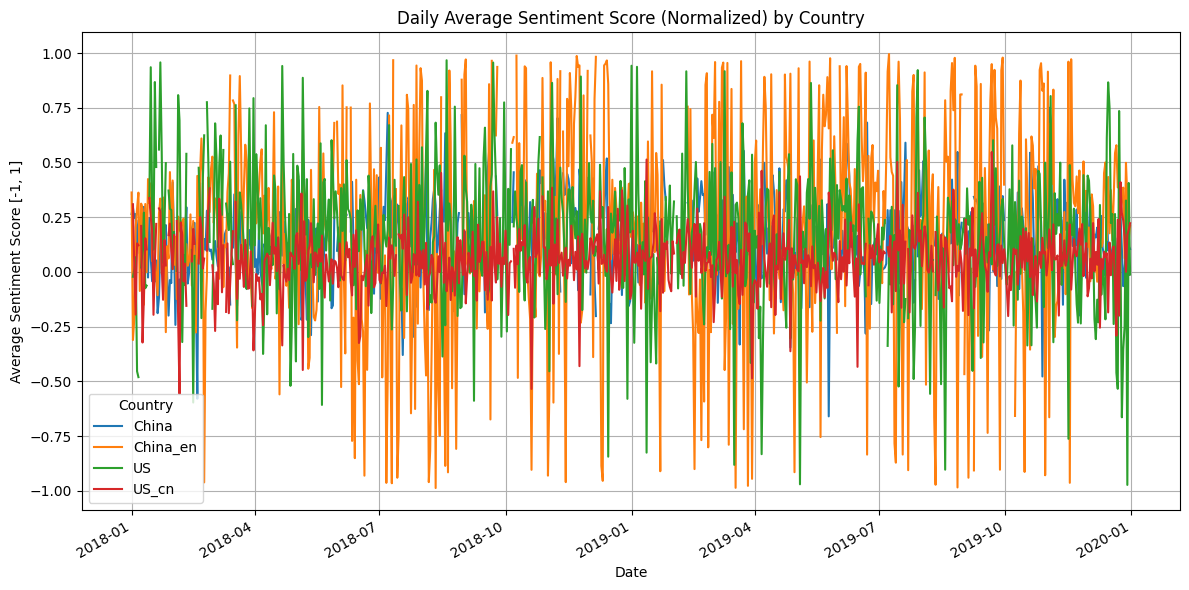

In [95]:

plt.figure(figsize=(12, 6))
df_pivot.plot(ax=plt.gca())
plt.title("Daily Average Sentiment Score (Normalized) by Country")
plt.ylabel("Average Sentiment Score [-1, 1]")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Country")
plt.show()


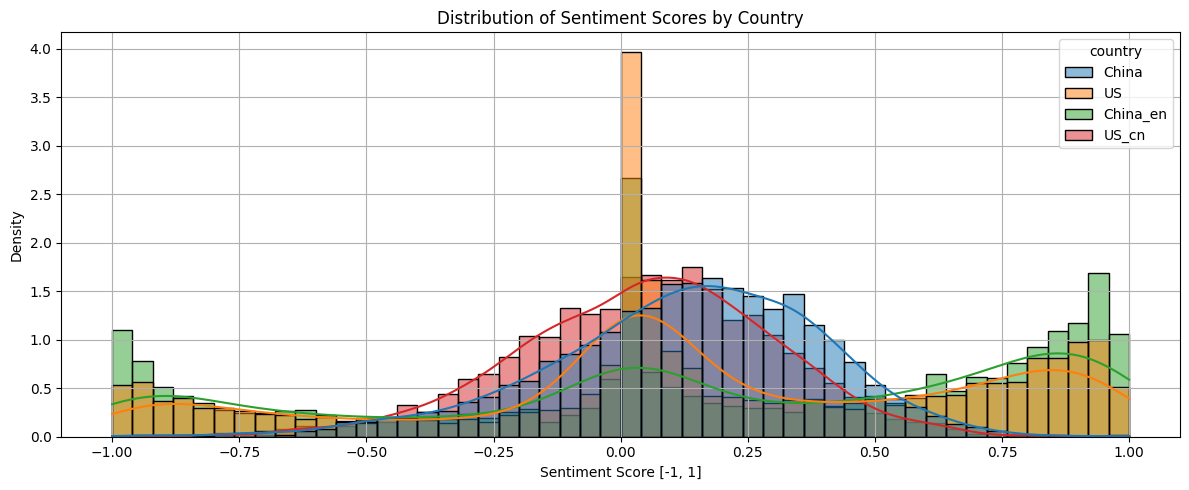

In [96]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_all, x="score", hue="country", bins=50, kde=True, stat="density", common_norm=False)
plt.title("Distribution of Sentiment Scores by Country")
plt.xlabel("Sentiment Score [-1, 1]")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

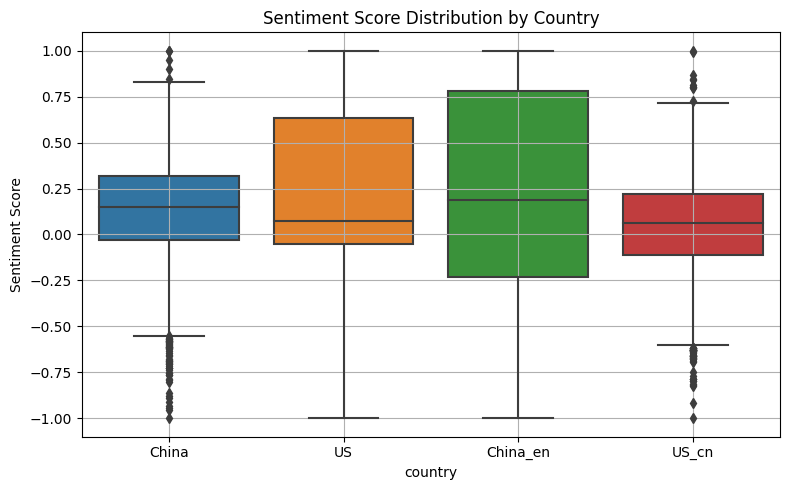

In [97]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_all, x="country", y="score")
plt.title("Sentiment Score Distribution by Country")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# avg scores for China and US

In [98]:
df_cn_daily = df_cn.groupby("date")["score"].mean().reset_index(name="cn_score")
df_cn_en_daily = df_cn_en.groupby("date")["score"].mean().reset_index(name="cn_score_en")

df_us_daily = df_us.groupby("date")["score"].mean().reset_index(name="us_score")
df_us_cn_daily = df_us_cn.groupby("date")["score"].mean().reset_index(name="us_score_cn")

df_cn_combined = pd.merge(df_cn_daily, df_cn_en_daily, on="date", how="outer")
df_us_combined = pd.merge(df_us_daily, df_us_cn_daily, on="date", how="outer")

df_cn_combined["cn_score_avg"] = df_cn_combined[["cn_score", "cn_score_en"]].mean(axis=1)
df_us_combined["us_score_avg"] = df_us_combined[["us_score", "us_score_cn"]].mean(axis=1)

df_cn_avg = df_cn_combined[["date", "cn_score_avg"]]
df_us_avg = df_us_combined[["date", "us_score_avg"]]

In [99]:
df_cn_avg

,date,cn_score_avg
0,2018-01-01,0.313776
1,2018-01-02,-0.008379
2,2018-01-03,0.018301
3,2018-01-04,0.234128
4,2018-01-05,0.199619
...,...,...
680,2019-12-27,0.037352
681,2019-12-28,0.297751
682,2019-12-29,0.121593
683,2019-12-30,0.130670


In [100]:
df_us_avg

,date,us_score_avg
0,2018-01-02,0.143685
1,2018-01-03,0.012039
2,2018-01-04,-0.063621
3,2018-01-05,-0.161390
4,2018-01-06,-0.179102
...,...,...
702,2019-12-27,-0.043221
703,2019-12-28,0.163425
704,2019-12-29,-0.401127
705,2019-12-30,0.299286


In [101]:
df_cn_avg["country"] = "China"
df_us_avg["country"] = "US"

df_cn_avg["score"] = df_cn_avg["cn_score_avg"]
df_us_avg["score"] = df_us_avg["us_score_avg"]

df_all_avg = pd.concat([df_cn_avg, df_us_avg], ignore_index=True)

df_daily = df_all_avg.groupby(["date", "country"])["score"].mean().reset_index(name="avg_sentiment")

df_pivot = df_daily.pivot(index="date", columns="country", values="avg_sentiment")


/var/folders/t5/m480qyfn2vnbgmm98d9vyd2m0000gn/T/ipykernel_72249/2365127563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cn_avg["country"] = "China"
/var/folders/t5/m480qyfn2vnbgmm98d9vyd2m0000gn/T/ipykernel_72249/2365127563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us_avg["country"] = "US"


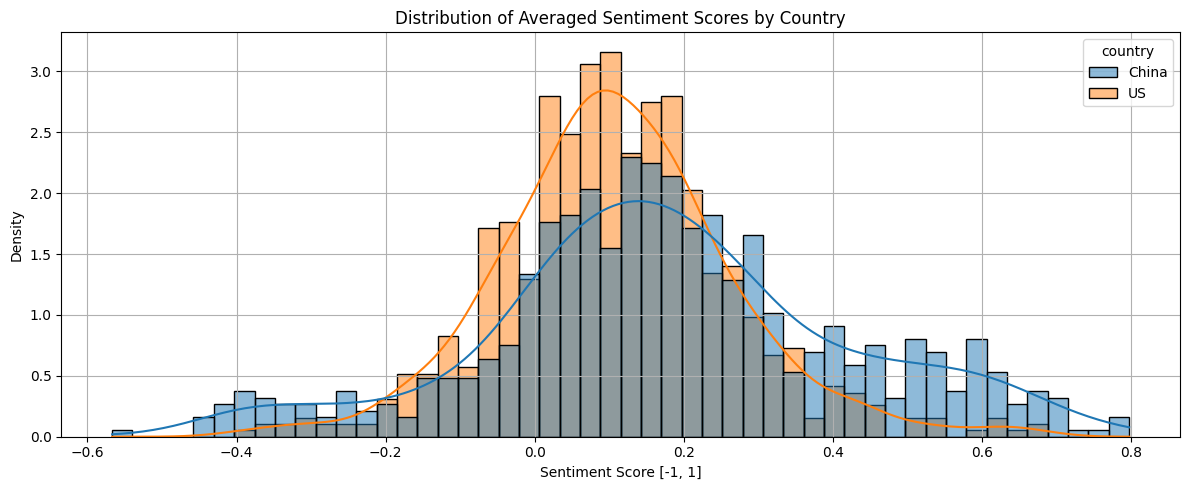

In [102]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_all_avg, x="score", hue="country", bins=50, kde=True, stat="density", common_norm=False)
plt.title("Distribution of Averaged Sentiment Scores by Country")
plt.xlabel("Sentiment Score [-1, 1]")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

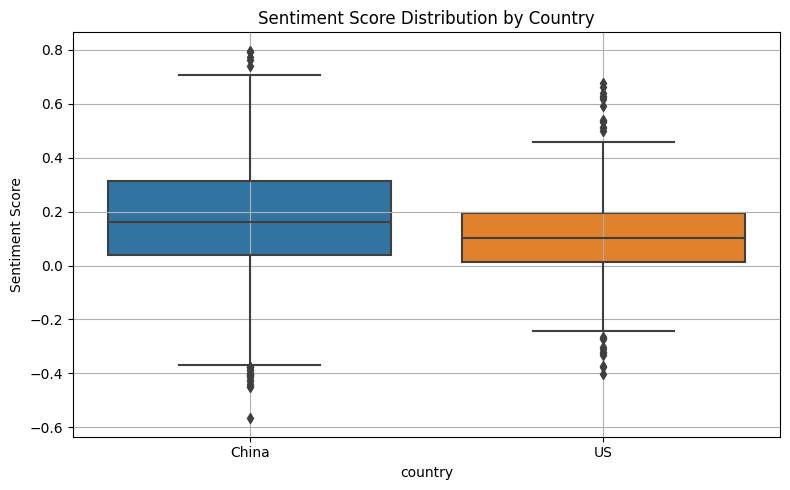

In [103]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_all_avg, x="country", y="score")
plt.title("Sentiment Score Distribution by Country")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()

### missing days

In [104]:
df_us_avg = df_us_avg.drop(columns=["score", "country"])
df_us_avg = df_us_avg.rename(columns={"us_score_avg":"score"})
df_us_avg

,date,score
0,2018-01-02,0.143685
1,2018-01-03,0.012039
2,2018-01-04,-0.063621
3,2018-01-05,-0.161390
4,2018-01-06,-0.179102
...,...,...
702,2019-12-27,-0.043221
703,2019-12-28,0.163425
704,2019-12-29,-0.401127
705,2019-12-30,0.299286


In [105]:
df_cn_avg = df_cn_avg.drop(columns=["score", "country"])
df_cn_avg = df_cn_avg.rename(columns={"cn_score_avg":"score"})
df_cn_avg

,date,score
0,2018-01-01,0.313776
1,2018-01-02,-0.008379
2,2018-01-03,0.018301
3,2018-01-04,0.234128
4,2018-01-05,0.199619
...,...,...
680,2019-12-27,0.037352
681,2019-12-28,0.297751
682,2019-12-29,0.121593
683,2019-12-30,0.130670


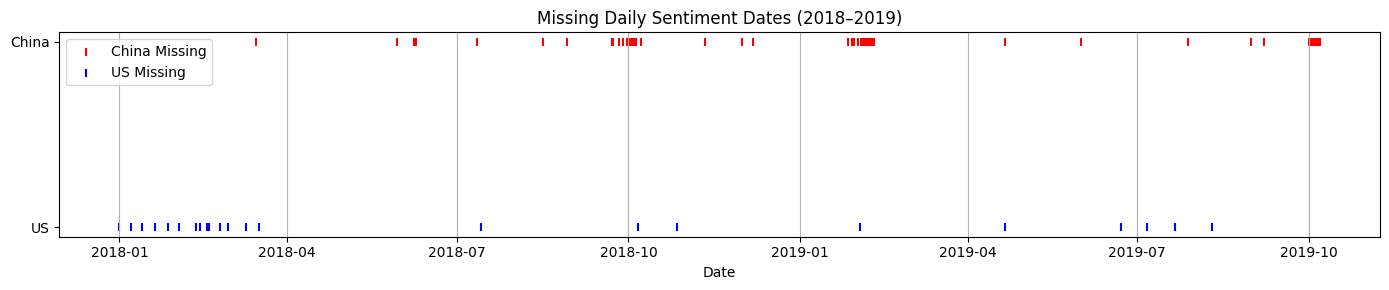

In [106]:
full_dates = pd.date_range(start="2018-01-01", end="2019-12-31", freq="D")

missing_cn_dates = full_dates.difference(df_cn_avg['date'])
missing_cn_df = pd.DataFrame({'missing_date_cn': missing_cn_dates})

missing_us_dates = full_dates.difference(df_us_avg['date'])
missing_us_df = pd.DataFrame({'missing_date_us': missing_us_dates})

plt.figure(figsize=(14, 3))
plt.scatter(missing_cn_dates, [1]*len(missing_cn_dates), label="China Missing", marker='|', color='red')
plt.scatter(missing_us_dates, [0]*len(missing_us_dates), label="US Missing", marker='|', color='blue')

plt.yticks([0, 1], ['US', 'China'])
plt.title("Missing Daily Sentiment Dates (2018–2019)")
plt.xlabel("Date")
plt.grid(True, axis='x')
plt.legend()
plt.tight_layout()
plt.show()

In [107]:
df_cn_avg.to_csv("data_scored/cn_avg.csv", index=False)
df_us_avg.to_csv("data_scored/us_avg.csv", index=False)

# scores with stock prices

In [108]:
df_cn_news = pd.read_csv("data_scored/cn_avg.csv", parse_dates=["date"], index_col=0)
df_us_news = pd.read_csv("data_scored/us_avg.csv", parse_dates=["date"], index_col=0)
df_csi300 = pd.read_csv("data_final/CSI300.csv", parse_dates=["Date"], index_col=0)
df_sp500 = pd.read_csv("data_final/SP500.csv", parse_dates=["Date"], index_col=0)

df_csi300.rename(columns={"Date": "date"}, inplace=True)
df_sp500.rename(columns={"Date": "date"}, inplace=True)

In [109]:
df_cn_news

,score
date,
2018-01-01,0.313776
2018-01-02,-0.008379
2018-01-03,0.018301
2018-01-04,0.234128
2018-01-05,0.199619
...,...
2019-12-27,0.037352
2019-12-28,0.297751
2019-12-29,0.121593


In [110]:
df_csi300

,date,Price,ChangePct
0,2019-12-31,4096.58,0.0037
1,2019-12-30,4081.63,0.0148
2,2019-12-27,4022.03,-0.0010
3,2019-12-26,4025.99,0.0088
4,2019-12-25,3990.87,-0.0005
...,...,...,...
482,2018-01-08,4160.16,0.0052
483,2018-01-05,4138.75,0.0024
484,2018-01-04,4128.81,0.0042
485,2018-01-03,4111.39,0.0059


In [111]:
df_csi300_clean = df_csi300[["date", "Price"]]
df_cn_daily_sent = df_cn_news.groupby("date")["score"].mean().reset_index(name="sentiment_score")
df_merged_cn= pd.merge(df_csi300_clean, df_cn_daily_sent, on="date", how="inner")
df_merged_cn

,date,Price,sentiment_score
0,2019-12-31,4096.58,0.158120
1,2019-12-30,4081.63,0.130670
2,2019-12-27,4022.03,0.037352
3,2019-12-26,4025.99,0.160330
4,2019-12-25,3990.87,0.222239
...,...,...,...
469,2018-01-08,4160.16,0.216278
470,2018-01-05,4138.75,0.199619
471,2018-01-04,4128.81,0.234128
472,2018-01-03,4111.39,0.018301


In [112]:
df_sp500_clean = df_sp500[["date", "Price"]]
df_us_daily_sent = df_us_news.groupby("date")["score"].mean().reset_index(name="sentiment_score")
df_merged_us= pd.merge(df_sp500_clean, df_us_daily_sent, on="date", how="inner")
df_merged_us

,date,Price,sentiment_score
0,2019-12-31,3230.8,0.105333
1,2019-12-30,3221.3,0.299286
2,2019-12-27,3240.0,-0.043221
3,2019-12-26,3239.9,-0.059736
4,2019-12-24,3223.4,0.244886
...,...,...,...
495,2018-01-08,2747.7,0.115217
496,2018-01-05,2743.2,-0.161390
497,2018-01-04,2724.0,-0.063621
498,2018-01-03,2713.1,0.012039


In [113]:
df_merged_us.to_csv("train_data/us_price_score.csv")
df_merged_cn.to_csv("train_data/cn_price_score.csv")

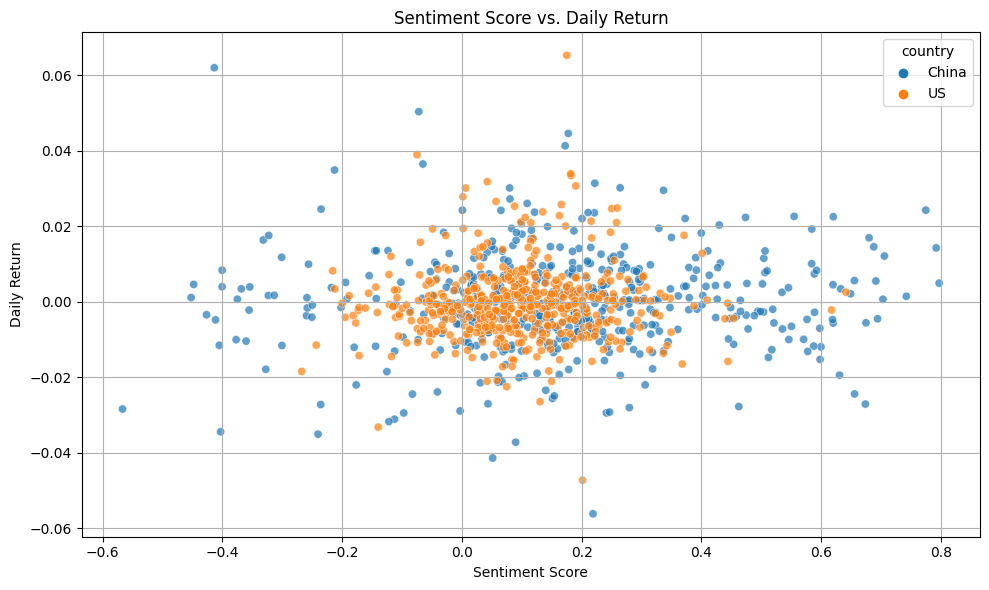

In [114]:
df_merged_cn["country"] = "China"
df_merged_us["country"] = "US"

df_merged_us["return"] = df_merged_us["Price"].pct_change()
df_merged_us.dropna(subset=["return"], inplace=True)

df_merged_cn["return"] = df_merged_cn["Price"].pct_change()
df_merged_cn.dropna(subset=["return"], inplace=True)

df_combined = pd.concat([df_merged_cn, df_merged_us], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combined, x="sentiment_score", y="return", hue="country", alpha=0.7)
plt.title("Sentiment Score vs. Daily Return")
plt.xlabel("Sentiment Score")
plt.ylabel("Daily Return")
plt.grid(True)
plt.tight_layout()
plt.show()